# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities[0:15])
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        
        status_code = response.status_code
        
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
    # Sleep for 1 second - Kourt aksed us to add and Prof showed us how to do it
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marataizes
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | yendi
Processing Record 5 of Set 1 | mahina
Processing Record 6 of Set 1 | tsiombe
Processing Record 7 of Set 1 | kill devil hills
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | san antonio de pale
Processing Record 10 of Set 1 | aioun
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | richards bay
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | puerto lempira
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | keflavik
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marataizes,-21.0433,-40.8244,22.82,86.0,0.0,4.05,BR,1.717453e+09
1,olonkinbyen,70.9221,-8.7187,0.40,92.0,99.0,8.45,SJ,1.717453e+09
2,kodiak,57.7900,-152.4072,8.73,87.0,100.0,4.12,US,1.717453e+09
3,yendi,9.4427,-0.0099,28.11,64.0,51.0,2.03,GH,1.717453e+09
4,mahina,-17.5065,-149.4890,28.87,65.0,75.0,3.09,PF,1.717453e+09


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marataizes,-21.0433,-40.8244,22.82,86.0,0.0,4.05,BR,1.717453e+09
1,olonkinbyen,70.9221,-8.7187,0.40,92.0,99.0,8.45,SJ,1.717453e+09
2,kodiak,57.7900,-152.4072,8.73,87.0,100.0,4.12,US,1.717453e+09
3,yendi,9.4427,-0.0099,28.11,64.0,51.0,2.03,GH,1.717453e+09
4,mahina,-17.5065,-149.4890,28.87,65.0,75.0,3.09,PF,1.717453e+09


In [8]:
# Check for Null Values
city_data_df.loc[pd.isnull(city_data_df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
32,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,manatutu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,tasbuget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,pasargad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,'ohonua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,jalalpore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,sofifi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop Null Values
clean_df = city_data_df.dropna(how="any").reset_index()
clean_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,marataizes,-21.0433,-40.8244,22.82,86.0,0.0,4.05,BR,1.717453e+09
1,1,olonkinbyen,70.9221,-8.7187,0.40,92.0,99.0,8.45,SJ,1.717453e+09
2,2,kodiak,57.7900,-152.4072,8.73,87.0,100.0,4.12,US,1.717453e+09
3,3,yendi,9.4427,-0.0099,28.11,64.0,51.0,2.03,GH,1.717453e+09
4,4,mahina,-17.5065,-149.4890,28.87,65.0,75.0,3.09,PF,1.717453e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

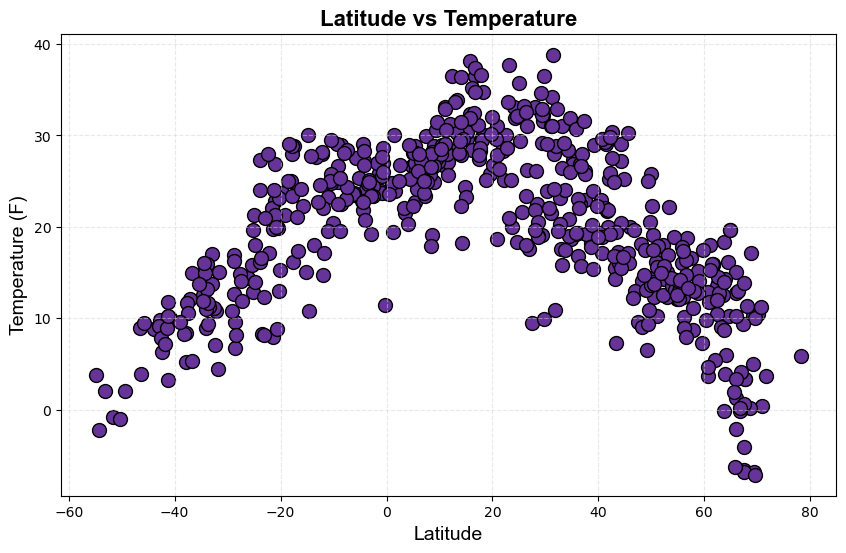

In [10]:
# Build scatter plot for latitude vs. temperature
x = clean_df.Lat
y = clean_df["Max Temp"]

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="rebeccapurple", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=14, fontname="Arial")
plt.ylabel("Temperature (F)", fontsize=14, fontname="Arial")
plt.title("Latitude vs Temperature", fontname="Arial",fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

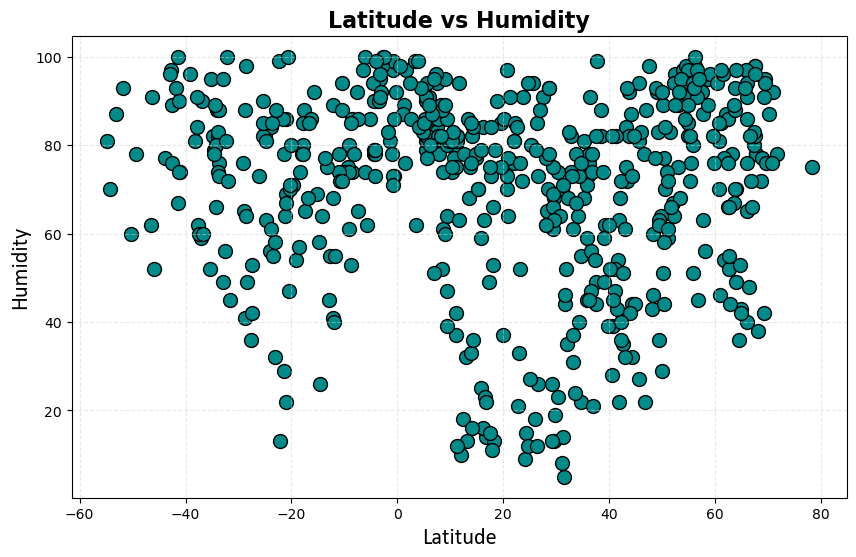

In [11]:
# Build the scatter plots for latitude vs. humidity
x = clean_df.Lat
y = clean_df.Humidity

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="darkcyan", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=16, fontname="Calibri")
plt.ylabel("Humidity", fontsize=16, fontname = "Calibri" )
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

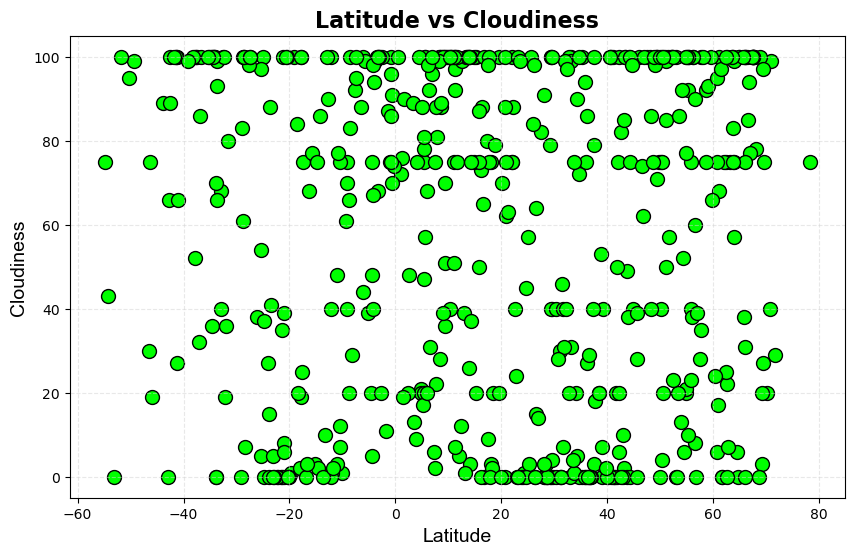

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x = clean_df.Lat
y = clean_df.Cloudiness

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="lime", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=14, fontname="Arial")
plt.ylabel("Cloudiness", fontsize=14, fontname="Arial")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

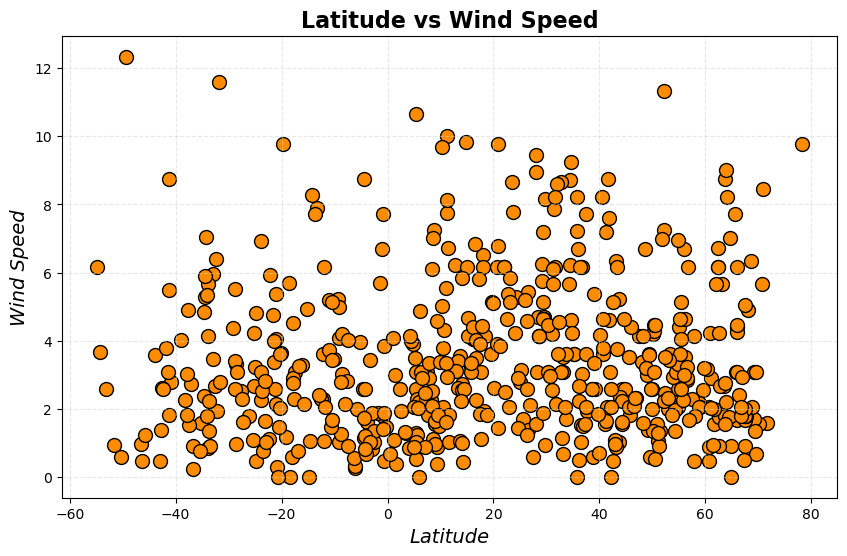

In [13]:
# Build the scatter plots for latitude vs. wind speed
x = clean_df.Lat
y = clean_df["Wind Speed"]

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="darkorange", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos,fontsize=15,color="black")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

 

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = clean_df.loc[clean_df.Lat >=0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,olonkinbyen,70.9221,-8.7187,0.40,92.0,99.0,8.45,SJ,1.717453e+09
2,2,kodiak,57.7900,-152.4072,8.73,87.0,100.0,4.12,US,1.717453e+09
3,3,yendi,9.4427,-0.0099,28.11,64.0,51.0,2.03,GH,1.717453e+09
6,6,kill devil hills,36.0307,-75.6760,27.00,73.0,75.0,6.69,US,1.717453e+09
9,9,aioun,16.6614,-9.6149,36.51,14.0,0.0,3.49,MR,1.717453e+09


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = clean_df.loc[clean_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,marataizes,-21.0433,-40.8244,22.82,86.0,0.0,4.05,BR,1.717453e+09
4,4,mahina,-17.5065,-149.4890,28.87,65.0,75.0,3.09,PF,1.717453e+09
5,5,tsiombe,-25.3000,45.4833,19.68,90.0,5.0,4.21,MG,1.717453e+09
7,7,waitangi,-43.9535,-176.5597,8.79,77.0,89.0,3.58,NZ,1.717453e+09
8,8,san antonio de pale,-1.4014,5.6325,25.83,81.0,87.0,5.68,GQ,1.717453e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5834835173293467


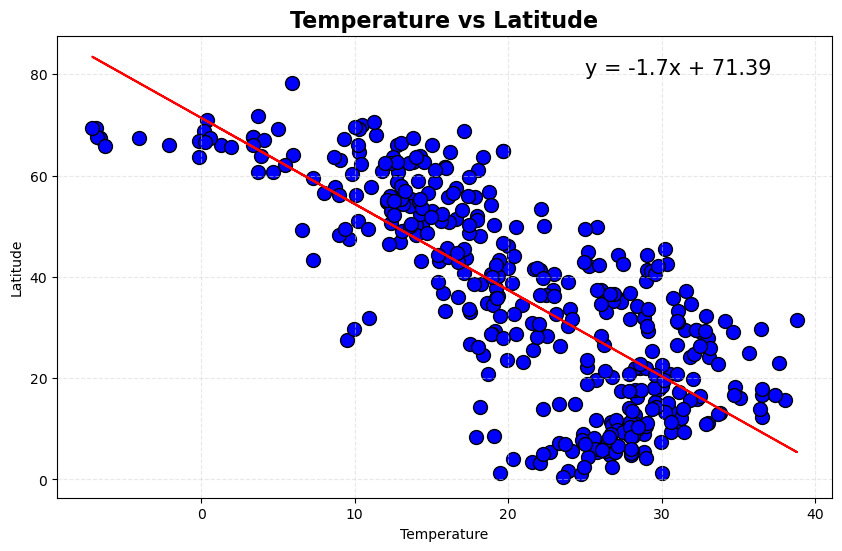

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]
x_label = "Temperature"
y_label = "Latitude"
doRegression(x_values, y_values, "Temperature", "Latitude", (25,80))

The r-squared is: 0.6899333982533034


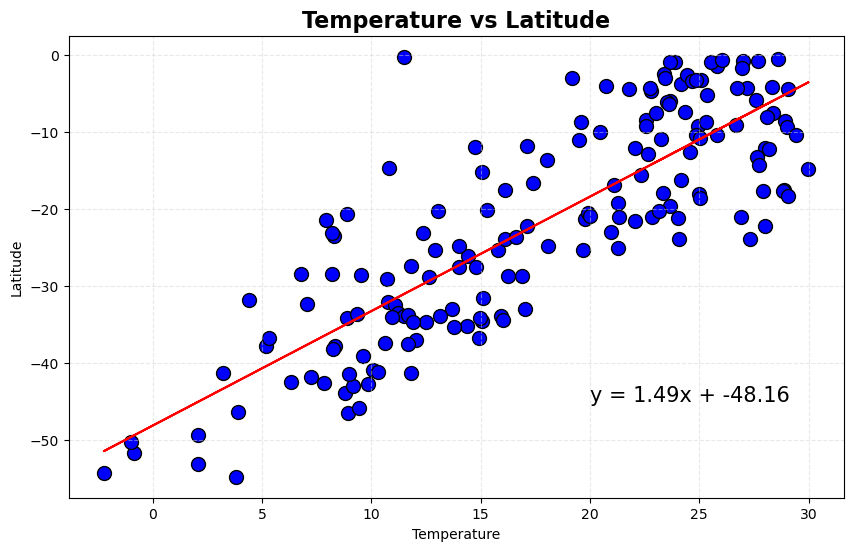

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df.Lat
x_label = "Temperature"
y_label = "Latitude"
doRegression(x_values, y_values, "Temperature", "Latitude", (20,-45))

**Discussion about the linear relationship:** There is a positive relationship between temperature and latitude in the southern hemisphere. It would be stronger if the R squared value(.69) was closer to 1. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.008354299084438493


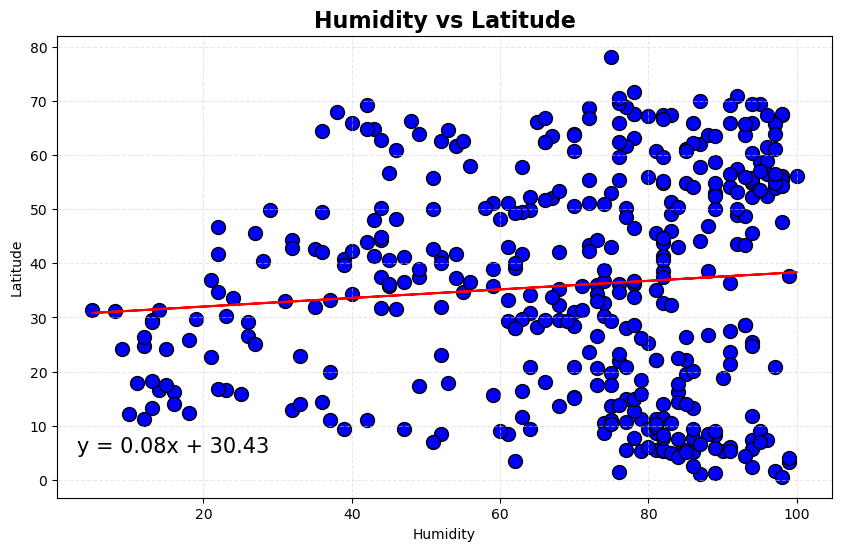

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df.Humidity
y_values = northern_hemi_df.Lat
x_label = "Humidity"
y_label = "Latitude"
doRegression(x_values, y_values, "Humidity", "Latitude", (3,5))

The r-squared is: 0.007541337187946897


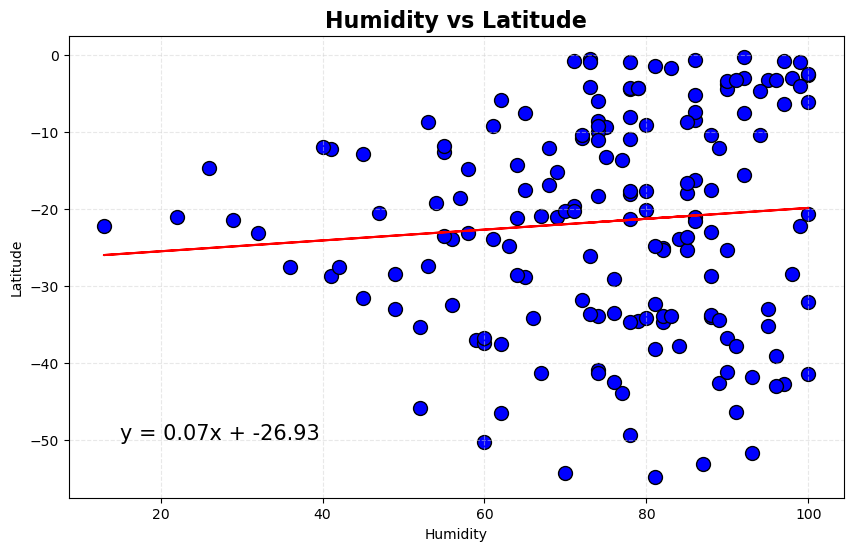

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df.Humidity
y_values = southern_hemi_df.Lat
x_label = "Humidity"
y_label = "Latitude"
doRegression(x_values, y_values, "Humidity", "Latitude", (15,-50))

**Discussion about the linear relationship:**  There is no relationship between humidity and latitude in the southern hemisphere. It would be stronger if the R squared value(.007) was closer to 1.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0013634126902646315


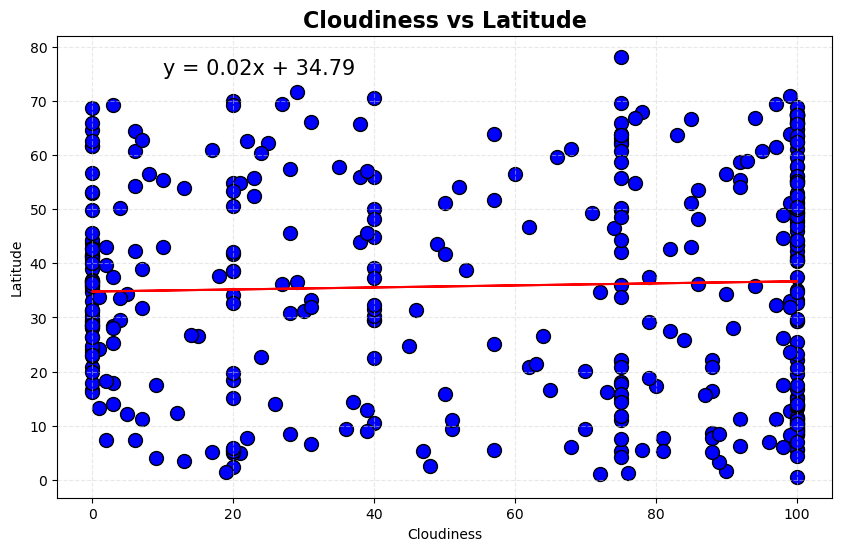

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df.Cloudiness
y_values = northern_hemi_df.Lat
x_label = "Cloudiness"
y_label = "Latitude"
doRegression(x_values, y_values, "Cloudiness", "Latitude", (10,75))

The r-squared is: 0.004424509875863878


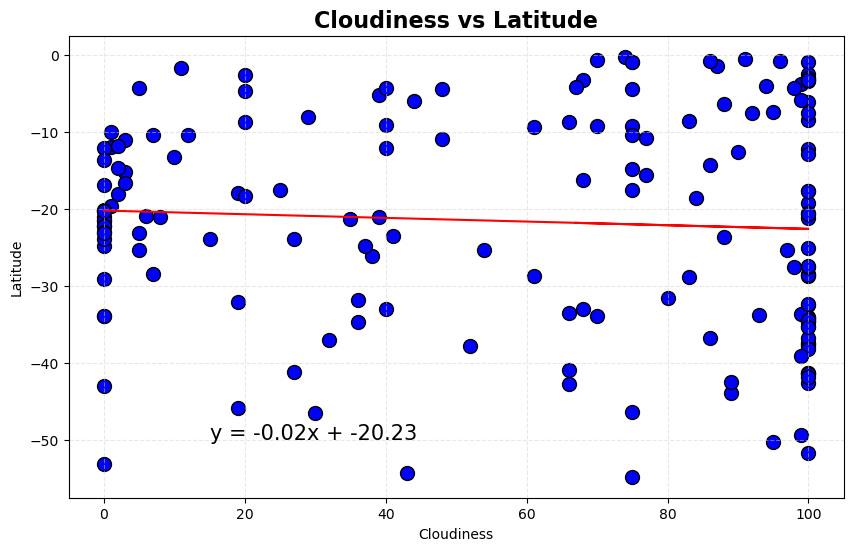

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df.Cloudiness
y_values = southern_hemi_df.Lat
x_label = "Cloudiness"
y_label = "Latitude"
doRegression(x_values, y_values, "Cloudiness", "Latitude", (15,-50))

**Discussion about the linear relationship:** There is no relationship between cloudiness and latitude in the southern hemisphere. It would be stronger if the R squared value(.004) was closer to 1.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0005812137598051624


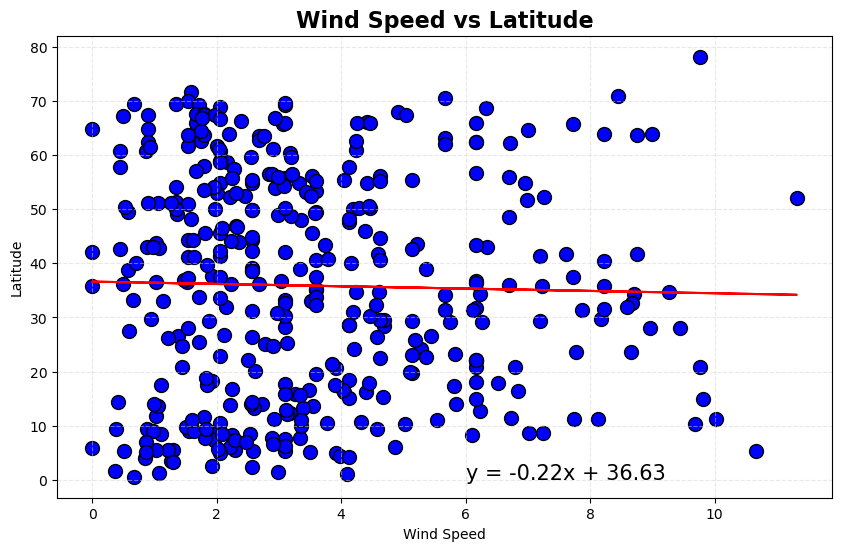

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df.Lat
x_label = "Wind Speed"
y_label = "Latitude"
doRegression(x_values, y_values, "Wind Speed", "Latitude", (6,0))

The r-squared is: 0.010573512029113791


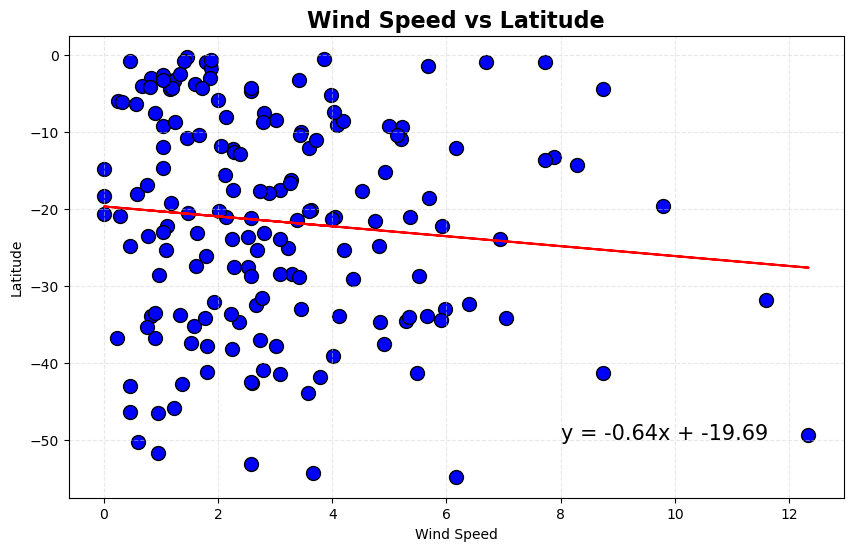

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df.Lat
x_label = "Wind Speed"
y_label = "Latitude"
doRegression(x_values, y_values, "Wind Speed", "Latitude", (8,-50))

**Discussion about the linear relationship:** There is no relationship between wind speed and latitude in the southern hemisphere. It would be stronger if the R squared value(.011) was closer to 1.